Problem id:017

problem category:smart city

problem title: Machine Learning based House Price Prediction System

problem description:
Normally house price is decided based on negotiation between seller and buyer. But there is a better way to decide price of a house. There are many factors which affect the price. For example, locality, average price in the locality, availability of transport, availability of health-care nearby, distance from schools, offices etc.. In US, nowadays there is a trend to use algorithms to decide price of a house. There is need of a machine learning algorithm which takes input different decisive parameters and outputs the estimated price.

# Machine Learning based House Price Prediction System

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\ADMIN\\house price prediction'

# import dataset

In [5]:
os.chdir('D:\SUSHMITHA\Dataframes_csvFiles')

In [6]:
os.getcwd()

'D:\\SUSHMITHA\\Dataframes_csvFiles'

In [7]:
df=pd.read_csv("house_dataset.csv")

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [9]:
df.shape

(4600, 18)

In [10]:
df.columns.tolist()

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country']

In [11]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [12]:
len(df)

4600

In [13]:
#get the statistical summary of data
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [14]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [15]:
#drop null values
df.dropna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09-07-2014,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09-07-2014,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09-07-2014,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10-07-2014,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [16]:
#to check the shape of dataset after droping null values
df.shape

(4600, 18)

In [17]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

# finding dependent and independent variables

here, the price is the dependent variable i.e., target variable which is tobe determined

In [18]:
f=['price','bedrooms','bathrooms','sqft_living','floors','condition','sqft_above','sqft_basement','yr_built','yr_renovated']

In [19]:
f

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

In [20]:
df=df[f]

In [21]:
df.shape

(4600, 10)

In [22]:
df['price'].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [23]:
X=df[f[1:]]
y=df['price']

In [24]:
X.shape

(4600, 9)

In [25]:
y.shape

(4600,)

In [26]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

In [27]:
X.columns.tolist()

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

# Splitting the dataset into training and testing dataset

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [30]:
X_train

,bedrooms,bathrooms,sqft_living,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
2583,2,1.00,890,1.0,4,760,130,1919,1985
1947,4,2.75,3110,2.0,4,3110,0,1983,0
2159,4,2.25,3160,1.0,4,3160,0,1981,0
4222,3,2.50,1460,2.0,3,1460,0,2000,0
2624,5,2.75,3010,2.0,3,3010,0,1994,0
...,...,...,...,...,...,...,...,...,...
2895,4,1.50,1220,1.0,3,1220,0,1980,0
2763,3,1.75,1970,1.0,5,1420,550,1963,0
905,3,2.50,1720,2.0,3,1720,0,2005,0
3980,4,3.25,4100,2.0,3,2500,1600,1981,2013


In [31]:
X_train.shape

(3680, 9)

In [32]:
X_test

,bedrooms,bathrooms,sqft_living,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
1351,5,2.00,2330,1.0,4,1190,1140,1962,0
1687,3,2.50,2730,2.0,3,2730,0,1998,2006
1297,3,2.00,1220,3.0,3,1220,0,2007,0
2101,4,1.75,2700,1.5,4,2700,0,1968,0
3920,3,4.00,2080,3.0,3,2080,0,1997,0
...,...,...,...,...,...,...,...,...,...
4487,4,1.00,2080,1.5,5,1260,820,1926,0
2215,2,1.00,1740,1.0,4,950,790,1924,0
3634,3,3.00,3790,2.0,3,2810,980,1989,0
3531,4,2.25,2300,1.0,3,1380,920,1959,1989


In [33]:
X_test.shape

(920, 9)

In [34]:
y_train

2583    460000.0
1947    749950.0
2159    965000.0
4222    299880.0
2624    837700.0
          ...   
2895    310000.0
2763    540000.0
905     280000.0
3980    775000.0
235     503000.0
Name: price, Length: 3680, dtype: float64

In [35]:
y_train.shape

(3680,)

# Create a model and train it

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
#fit the regression model
model=LinearRegression()

In [38]:
#train the model
model.fit(X_train,y_train)

LinearRegression()

In [39]:
model.coef_

array([-6.41809782e+04,  6.34941303e+04,  1.75786847e+02,  4.33682919e+04,
        3.49531298e+04,  9.11205426e+01,  8.46663047e+01, -2.42190498e+03,
        8.97511962e+00])

In [40]:
model.coef_[1]

63494.13025780838

In [41]:
model.intercept_

4648087.108090813

# Evaluate the model

In [51]:
X_test

,bedrooms,bathrooms,sqft_living,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
1351,5,2.00,2330,1.0,4,1190,1140,1962,0
1687,3,2.50,2730,2.0,3,2730,0,1998,2006
1297,3,2.00,1220,3.0,3,1220,0,2007,0
2101,4,1.75,2700,1.5,4,2700,0,1968,0
3920,3,4.00,2080,3.0,3,2080,0,1997,0
...,...,...,...,...,...,...,...,...,...
4487,4,1.00,2080,1.5,5,1260,820,1926,0
2215,2,1.00,1740,1.0,4,950,790,1924,0
3634,3,3.00,3790,2.0,3,2810,980,1989,0
3531,4,2.25,2300,1.0,3,1380,920,1959,1989


In [52]:
y_test

1351     389000.0
1687    1000000.0
1297     355000.0
2101     390000.0
3920     715000.0
          ...    
4487          0.0
2215     315000.0
3634    1165000.0
3531     417000.0
3955     609000.0
Name: price, Length: 920, dtype: float64

In [54]:
y_pred=model.predict(X_test)

In [55]:
y_pred

array([ 520946.10717711,  758651.72688695,  316787.60744059,
        668608.55667394,  608887.81279908,  604815.39514474,
        238772.12908697,  287404.40015713,  463616.0951692 ,
        375408.43406327,  444718.04537024,  355182.81296359,
        335961.01260105,  776717.48023744,  282404.36097132,
        559272.90259349,  606526.43085693,  489434.68038284,
        358483.13468893,  551868.47698723,  479920.73415364,
        508894.94284312,  746462.97940112,  203218.01705496,
        645159.36675559,  592269.75108608,  318514.01138603,
        256347.38115391,  594575.73483421,  494026.35327018,
        498593.28538901,  713620.69761987,  234279.38387176,
        321326.0345448 ,  548682.1810699 ,  457149.807995  ,
        250515.45549475,  417797.0696418 ,  630776.98807003,
        249392.75650266,  934708.02889185,  376679.43972399,
        758051.03976916,  540584.54897331,  472668.81621786,
        624964.89410173,  517173.48989995,  735246.192635  ,
        364456.72679575,

In [44]:
import matplotlib.pyplot as plt

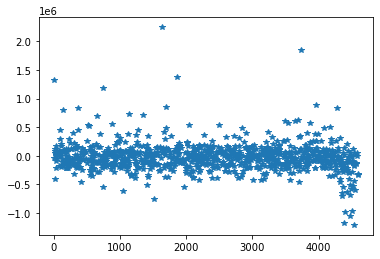

In [45]:
#plot the error
g=plt.plot(y_test-y_test_predict,marker='*',linestyle='')

In [46]:
model=LinearRegression(fit_intercept=False)


In [47]:
model.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [48]:
y_test_predict=model.predict(X_test)

In [49]:
y_test_predict

array([ 520946.10717711,  758651.72688695,  316787.60744059,
        668608.55667394,  608887.81279908,  604815.39514474,
        238772.12908697,  287404.40015713,  463616.0951692 ,
        375408.43406327,  444718.04537024,  355182.81296359,
        335961.01260105,  776717.48023744,  282404.36097132,
        559272.90259349,  606526.43085693,  489434.68038284,
        358483.13468893,  551868.47698723,  479920.73415364,
        508894.94284312,  746462.97940112,  203218.01705496,
        645159.36675559,  592269.75108608,  318514.01138603,
        256347.38115391,  594575.73483421,  494026.35327018,
        498593.28538901,  713620.69761987,  234279.38387176,
        321326.0345448 ,  548682.1810699 ,  457149.807995  ,
        250515.45549475,  417797.0696418 ,  630776.98807003,
        249392.75650266,  934708.02889185,  376679.43972399,
        758051.03976916,  540584.54897331,  472668.81621786,
        624964.89410173,  517173.48989995,  735246.192635  ,
        364456.72679575,

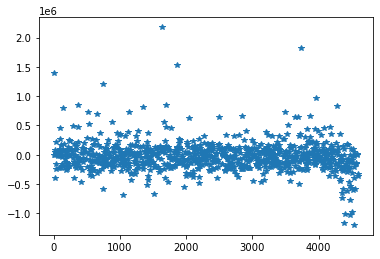

In [50]:
g=plt.plot(y_test-y_test_predict,marker='*',linestyle='')